## En este notebook vamos a crear un dataframe con los datos de divisionimport pandas as pd


In [101]:
import pandas as pd
import os
import glob
import os
import string

In [69]:
path =(r"C:/projectos/manifolds/ciudades/datos/division")
os.chdir(path)

In [70]:
file_name = []
for file in os.listdir():
    file_name.append(file) 

In [71]:
#file_name

In [72]:
df = pd.DataFrame(columns = ['NP', 'DIVISION', 'SPLIT', 'MESH'])
df

,NP,DIVISION,SPLIT,MESH


In [73]:
dict_metricas = {}

for file in file_name:
    n = -4
    with open(file) as f:
        lines = f.readlines()[n:]
        for line in lines:
            x = line.split(" ", 1)
            dict_metricas[x[0]] = x[1][:-1]
            df_temp = pd.DataFrame(dict_metricas, index = [file])
        df = pd.concat([df, df_temp], axis = 0)

In [74]:
dict_metricas

{'NP': '33840',
 'DIVISION': '0.999085',
 'SPLIT': '1092.444948',
 'MESH': '61016.933997',
 'Landscape': 'Indices'}

In [100]:
df_division = df.reset_index()

In [76]:
df_division.head()

,index,NP,DIVISION,SPLIT,MESH,Landscape
0,albacete_division.txt,16340,0.998687,761.324954,30324.38851,NaN
1,alcala division.txt,12799,0.997699,434.606088,54766.19330,NaN
2,alcorcon_division.txt,5605,0.997393,383.553726,32451.17466,NaN
3,algeciras_division.txt,19036,0.996577,292.158740,72379.330489,NaN
4,alicante_division.txt,23930,0.999096,1106.442543,35305.458629,NaN


In [77]:
df_division[['ciudad','metrica']] = df_division['index'].str.split('_division',1,expand = True)

C:\Users\crist\AppData\Local\Temp\ipykernel_24516\4219627780.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_division[['ciudad','metrica']] = df_division['index'].str.split('_division',1,expand = True)


In [82]:
df_division = df_division.loc[:,["ciudad","NP","DIVISION","SPLIT","MESH"]]

In [87]:
df_division.to_csv('ciudades_division.csv')

In [93]:
df_division.dtypes

ciudad      object
NP          object
DIVISION    object
SPLIT       object
MESH        object
dtype: object

In [96]:
df_division['DIVISION'] = df_division.NP.astype('float')

In [98]:
df_division.head()

0    16340.0
1    12799.0
2     5605.0
3    19036.0
4    23930.0
Name: NP, dtype: float64

AttributeError: 'Rectangle' object has no property 'column'

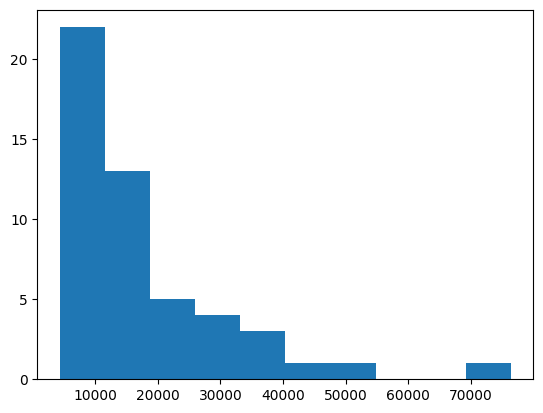

In [99]:
df_division.hist(column = 'DIVISION', by = None)